In [11]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matthiasseeber/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
stopwords = ["Femizid", "Frauenmord", "Beziehungstat", "Notrufnummern", "Notrufnummer", "Beziehungsdrama", "Bluttat", "Beziehungstat", "Beziehungsdrama", "Familientragödie", "Ausländer", "Einzelfall", "Gesellschaftsproblem", "Sextäter", "Sexattacke", "Sexverbrechen", "Rache", "Eifersucht", "Gewaltprävention", "Hilfeleistung", "Helpline", "Killer", "Täter", "Opfer"]
stopwords = [word.lower() for word in stopwords]

In [7]:
newspaper_name = "standard"
#newspaper_name = "presse"
#newspaper_name = "heute"
#newspaper_name = "krone"
df = pd.read_excel('Daten_Femizide.xlsx', sheet_name = [newspaper_name])
# get df from dict
df = df[newspaper_name]
#set index
df = df.reset_index()
#add column
df["num_sentences"] = pd.NaT
df["num_words"] = pd.NaT
df["stopwords_count"] = pd.NaT

number_of_articles = len(df)
number_of_articles

93

In [8]:
df.head()

,index,text,num_sentences,num_words,stopwords_count
0,0,Ich bewundere den weisen Zugang des Arbeitsmin...,NaT,NaT,NaT
1,1,Vielleicht muss man alle bürgerlichen Tugenden...,NaT,NaT,NaT
2,2,„Also bitte: Cool down!“\n\nMit „Blaue Frau“ h...,NaT,NaT,NaT
3,3,"Geht es um Frauenmorde oder um den Verdacht, d...",NaT,NaT,NaT
4,4,Auf 31 Femizide kommen die Autonomen Frauenhäu...,NaT,NaT,NaT


In [12]:
# loop trough df

for index, row in df.iterrows():
    text = row["text"].lower()
    sentences = sent_tokenize(text)
    num_sentences = len(sentences)
    words = word_tokenize(text)
    num_words = len(words)
    df.at[index,'num_sentences']= num_sentences
    df.at[index,'num_words']= num_words
    # check for stopwords
    stopwordscount = [0 for x in stopwords]
    for stopword in stopwords:
        if stopword in text:
            index_of_value = stopwords.index(stopword)
            stopwordscount[index_of_value] += 1
    
    df.at[index,'stopwords_count'] = 0 #place holder for cast
    df.at[index,'stopwords_count'] = list(stopwordscount)
    #df.at[index,'stopwords_count'] = [0,0,0,0]

In [13]:
df.head()

,index,text,num_sentences,num_words,stopwords_count
0,0,Ich bewundere den weisen Zugang des Arbeitsmin...,4,116,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,Vielleicht muss man alle bürgerlichen Tugenden...,14,222,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,„Also bitte: Cool down!“\n\nMit „Blaue Frau“ h...,175,2781,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,"Geht es um Frauenmorde oder um den Verdacht, d...",10,244,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,Auf 31 Femizide kommen die Autonomen Frauenhäu...,12,238,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [14]:
#loop throug df and get dict of all words with their count
stopwords_dict = {}
for index, row in df.iterrows():
    text = row["text"].lower()
    for stopword in stopwords:
        if stopword in text:
            count = text.count(stopword)
            if not stopword in stopwords_dict:
                stopwords_dict[stopword] = count
            else:
                stopwords_dict[stopword] += count

# sort dict
stopwords_dict = dict(sorted(stopwords_dict.items(), key=lambda item: item[1],reverse=True))
stopwords_dict["type"] = "absolut"
stopwords_dict


{'opfer': 165,
 'täter': 124,
 'femizid': 101,
 'frauenmord': 86,
 'rache': 25,
 'gewaltprävention': 10,
 'beziehungstat': 8,
 'eifersucht': 7,
 'helpline': 5,
 'ausländer': 4,
 'beziehungsdrama': 4,
 'einzelfall': 3,
 'bluttat': 2,
 'notrufnummern': 1,
 'notrufnummer': 1,
 'type': 'absolut'}

In [15]:
#loop throug df and get dict of all words with their relative appearance to the number of articles
stopwords_dict_relative = {}
for index, row in df.iterrows():
    for i in range(len(row["stopwords_count"])):
        if row["stopwords_count"][i] != 0:
            stopword = stopwords[i]
            if not stopword in stopwords_dict_relative:
                stopwords_dict_relative[stopword] = 1
            else:
                stopwords_dict_relative[stopword] += 1

      
# convert to percent
for key in stopwords_dict_relative:
    stopwords_dict_relative[key] = round((stopwords_dict_relative[key]/number_of_articles)*100,2)


#ort dict
stopwords_dict_relative = dict(sorted(stopwords_dict_relative.items(), key=lambda item: item[1],reverse=True))
stopwords_dict_relative["type"] = "relativ"
stopwords_dict_relative



{'femizid': 66.67,
 'frauenmord': 59.14,
 'opfer': 51.61,
 'täter': 45.16,
 'rache': 12.9,
 'gewaltprävention': 9.68,
 'eifersucht': 4.3,
 'beziehungstat': 4.3,
 'ausländer': 4.3,
 'helpline': 4.3,
 'einzelfall': 2.15,
 'bluttat': 2.15,
 'beziehungsdrama': 2.15,
 'notrufnummern': 1.08,
 'notrufnummer': 1.08,
 'type': 'relativ'}

In [17]:
stopwords_dict_relative_keys = list(stopwords_dict_relative.keys())
stopwords_dict_relative_values = stopwords_dict_relative.values()
stopwords_dict_values = stopwords_dict.values()

df_result = pd.DataFrame( columns=stopwords_dict_relative_keys)
df_result = df_result.append(stopwords_dict, ignore_index = True)
df_result = df_result.append(stopwords_dict_relative, ignore_index = True)
df_result.to_csv("csv/"+newspaper_name+".csv", index = False)

/var/folders/4h/dc444y5n53s2wccx80rmnh280000gn/T/ipykernel_84638/2529893169.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(stopwords_dict, ignore_index = True)
/var/folders/4h/dc444y5n53s2wccx80rmnh280000gn/T/ipykernel_84638/2529893169.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(stopwords_dict_relative, ignore_index = True)


In [18]:
df_result.head()

,femizid,frauenmord,opfer,täter,rache,gewaltprävention,eifersucht,beziehungstat,ausländer,helpline,einzelfall,bluttat,beziehungsdrama,notrufnummern,notrufnummer,type
0,101,86,165,124,25,10,7,8,4,5,3,2,4,1,1,absolut
1,66.67,59.14,51.61,45.16,12.9,9.68,4.3,4.3,4.3,4.3,2.15,2.15,2.15,1.08,1.08,relativ


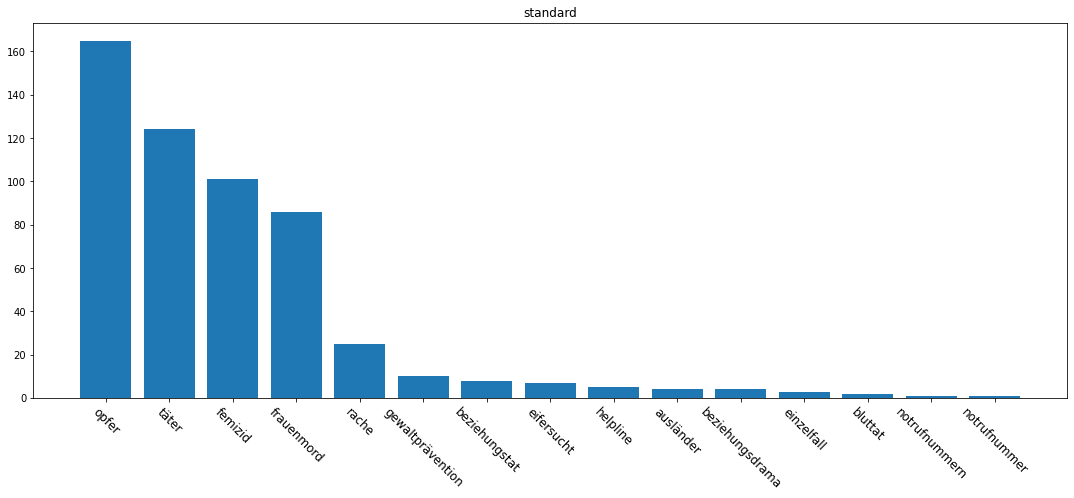

In [19]:
#values absolute
#remove type
stopwords_dict.pop('type', None)

plt.figure(figsize=(15, 7))
plt.title(newspaper_name)
plt.bar(range(len(stopwords_dict)), list(stopwords_dict.values()))
plt.xticks(range(len(stopwords_dict)), list(stopwords_dict.keys()))
plt.xticks(fontsize=12, rotation=315)
plt.tick_params(axis='both', which='minor', labelsize=13)
plt.tight_layout(pad=1)
plt.savefig('grafiken/absolut/'+newspaper_name+'.jpg')
plt.show()

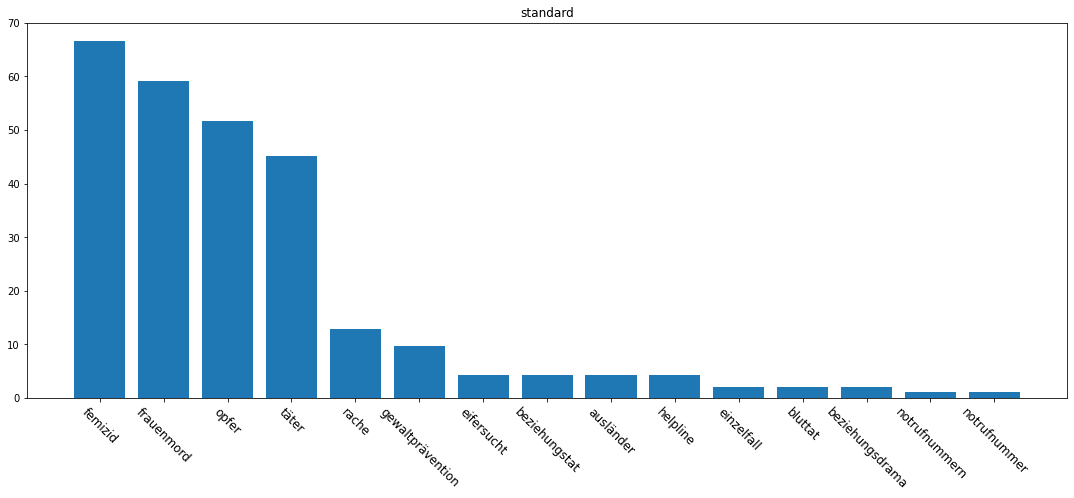

In [20]:
#values relative

#remove type
stopwords_dict_relative.pop('type', None)

plt.figure(figsize=(15, 7))
plt.title(newspaper_name)
plt.bar(range(len(stopwords_dict_relative)), list(stopwords_dict_relative.values()))
plt.xticks(range(len(stopwords_dict_relative)), list(stopwords_dict_relative.keys()))
plt.xticks(fontsize=12, rotation=315)
plt.tick_params(axis='both', which='minor', labelsize=13)
plt.tight_layout(pad=1)
plt.savefig('grafiken/relativ/'+newspaper_name+'.jpg')
plt.show()